# Analysis of a dataset of anonymized financial transactions

In [1]:
# Loading all the important libraries and the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import seaborn as sns; sns.set()
from datetime import datetime
from collections import OrderedDict
import random

data = pd.read_csv('anonymized.csv') # Loading the data with pandas
data.head()

,Date,Amount
0,25May2016,54241.35
1,29May2017,54008.83
2,30Jun2017,54008.82
3,05Jan2017,52704.37
4,23Feb2017,52704.36


### Data consolidating, cleaning and pre-processing

In [145]:
counts = OrderedDict()
days = []
dates = []

# Here, we restructure the date strings and convert them to a DateTime format

for date in data.Date: 
    day = date[0:2]
    month = date[2:5]
    year = date[5:9]
    
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    index = months.index(month)
    
    if index ==9 or index == 10 or index == 11:
        string_index = str(index +1)
    else:
        string_index = '0' + str(index +1)
    
    final_date = day +'/' + string_index + '/' + year # Restructuring the date
    
    actual_date = datetime.strptime(final_date,'%d/%m/%Y').date()
    
    # Collecting all transactions in a unique month
    if string_index + year in counts.keys(): 
        counts[string_index + year] += 1
    else:
        counts[string_index + year] = 1
    
    days.append(float(day)) # Collecting all the days for the second model
    dates.append(actual_date)

In [3]:
data['Dates'] = pd.Series(dates, index=data.index)
data.head() # New data

,Date,Amount,Dates
0,25May2016,54241.35,2016-05-25
1,29May2017,54008.83,2017-05-29
2,30Jun2017,54008.82,2017-06-30
3,05Jan2017,52704.37,2017-01-05
4,23Feb2017,52704.36,2017-02-23


In [4]:
print('The Transactions go from',min(dates),'to',max(dates)) # The date range

The Transactions go from 2013-09-20 to 2017-09-28


# Modeling the number of transactions

### 1. Raw method using bar graphs with variable number of bins

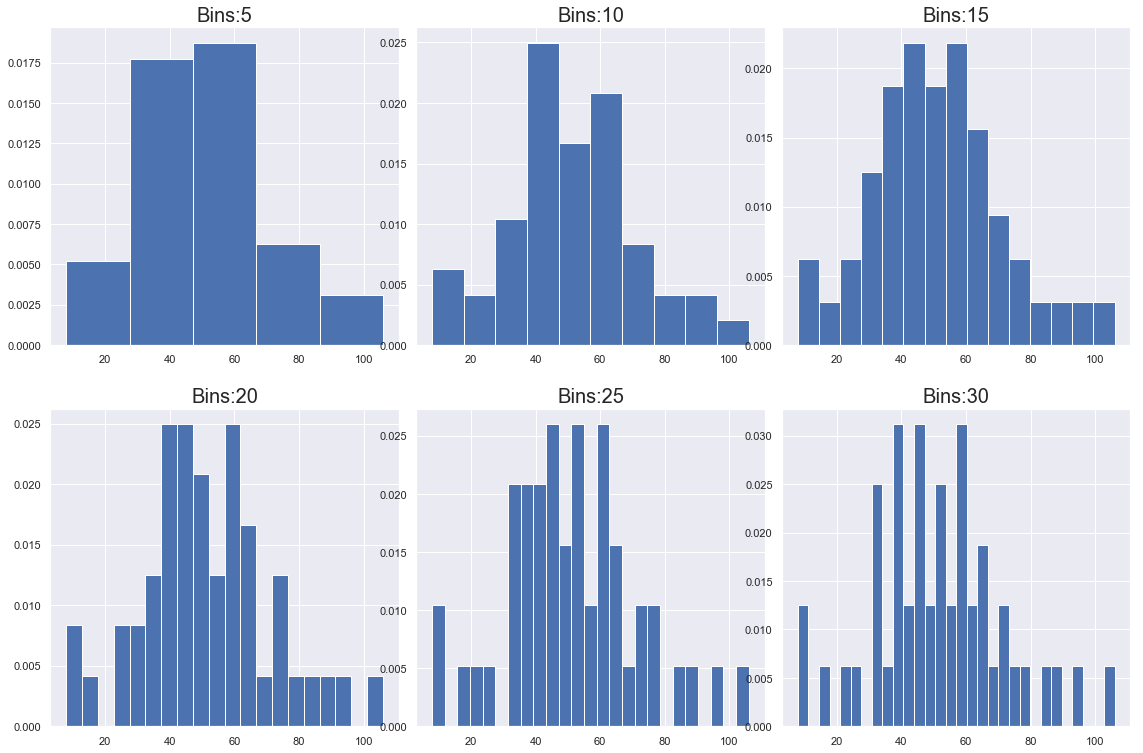

In [5]:
number_of_transactions = counts.values() # Gettting the values of transactions ine ach unique month

# Plotting the number of transactions for different bin sizes

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.05)

for i in [5,10,15,20,25,30]:
    fig.add_subplot(3,3, i//5);
    hist = plt.hist(number_of_transactions, bins=i, density=True)
    plt.title('Bins:' + str(i), fontsize=20)
    
plt.show()

### 2. Advanced method using a Kernel Density algorithm with variable bandwidth

In [8]:
number_of_transactions = np.array(list(number_of_transactions)).reshape(-1,1)

logprobs = []
X_plot = np.linspace(0,120,121).reshape(-1,1)

# We run the Gaussian Kernel density model for a realistic support line (X_plot)
# We collect the set of log probabilities of each model for plotting purposes later

bandwidths = [1,1.5,2,2.5,3,3.5,4,4.5,5] # These were selected by manual observations of the model

for bandwidth in bandwidths:
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(number_of_transactions)
    logprob = kde.score_samples(X_plot)
    logprobs.append(logprob)

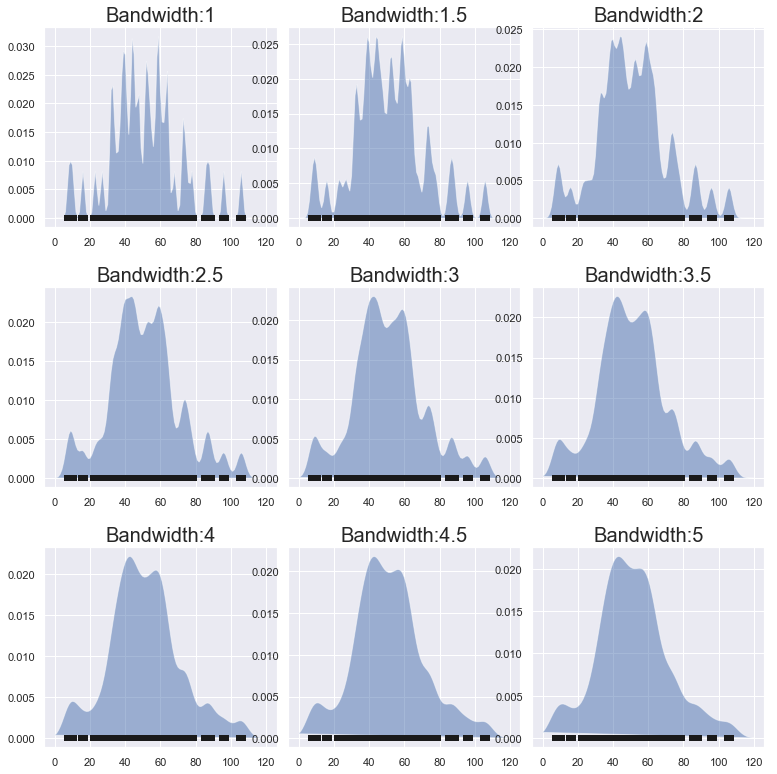

In [9]:
# Plotting the set of probabilities as a distribution for different bandwidths

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.3, wspace=0.05)

for i in range(9):
    fig.add_subplot(3,3, i+1);
    plt.fill(X_plot, np.exp(logprobs[i]), alpha=0.5)
    plt.plot(number_of_transactions, np.full_like(number_of_transactions, -0.0001), '|k', markeredgewidth=10)
    plt.title('Bandwidth:' + str(bandwidths[i]), fontsize=20)
    
plt.show()

In [108]:
# Selecting the best set of log probabilities
logprob = logprobs[6]

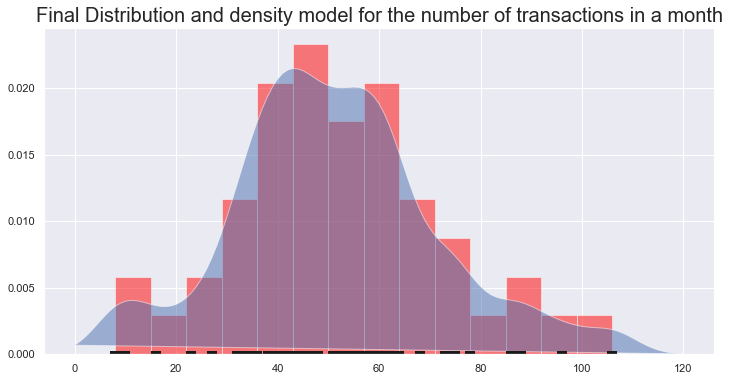

In [63]:
# Plotting the ideal bin size histogram with the ideal kernel density bandwidth plot

plt.figure(figsize=(12,6))
plt.hist(number_of_transactions, density=True,bins=14,alpha=0.5,color='red')
plt.fill(X_plot, np.exp(logprob), alpha=0.5)
plt.plot(number_of_transactions, np.full_like(number_of_transactions, -0.0001), '|k', markeredgewidth=10)
plt.title('Final Distribution and density model for the number of transactions in a month', fontsize=20)
plt.show()

# Model the day of the month for a transaction

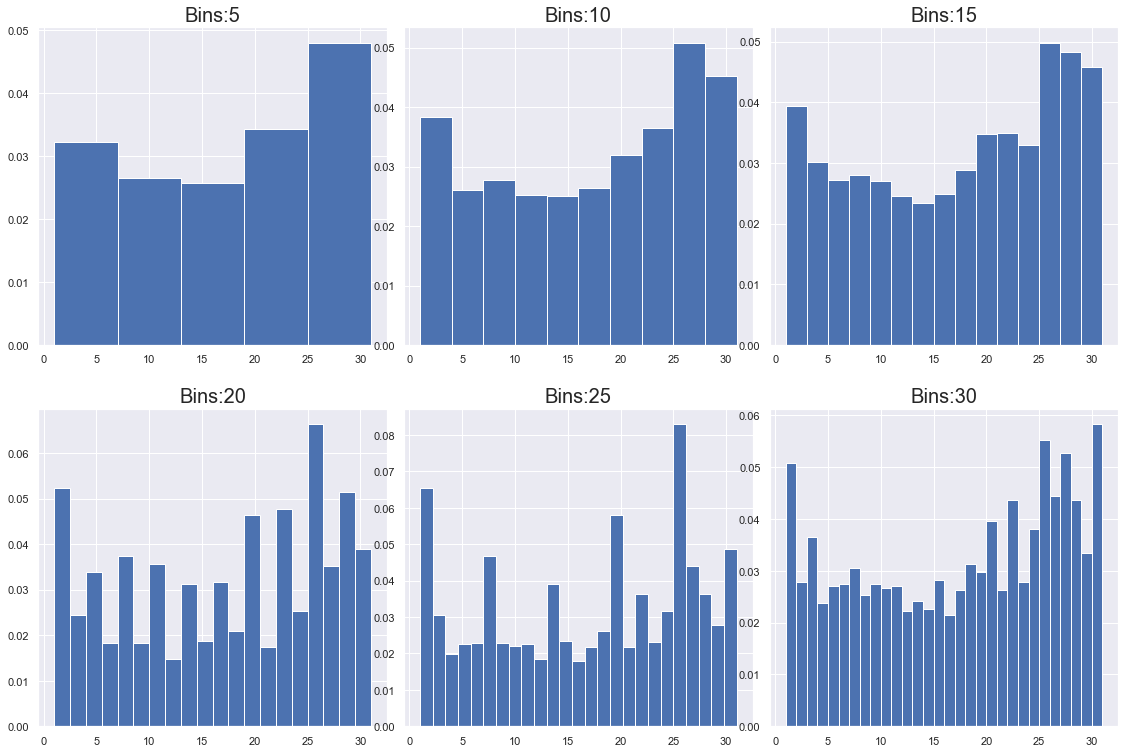

In [13]:
# Plotting the data for days in the month for different bin sizes

days = np.array(days).reshape(-1,1)

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.05)

for i in [5,10,15,20,25,30]:
    fig.add_subplot(3,3, i//5);
    hist = plt.hist(days, bins=i, density=True)
    plt.title('Bins:' + str(i), fontsize=20)
    
plt.show()

In [14]:
logprobs2 = []
X_plot2 = np.linspace(1,31,31).reshape(-1,1)
days_in_month = np.array(days).reshape(-1,1)

# We run the Gaussian Kernel density model for a realistic support line (X_plot2)
# We collect the set of log probabilities of each model for plotting purposes later

bandwidths2 = [0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5]

for bandwidth in bandwidths2:
    kde2 = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde2.fit(days_in_month)
    logprob2 = kde2.score_samples(X_plot2)
    logprobs2.append(logprob2)

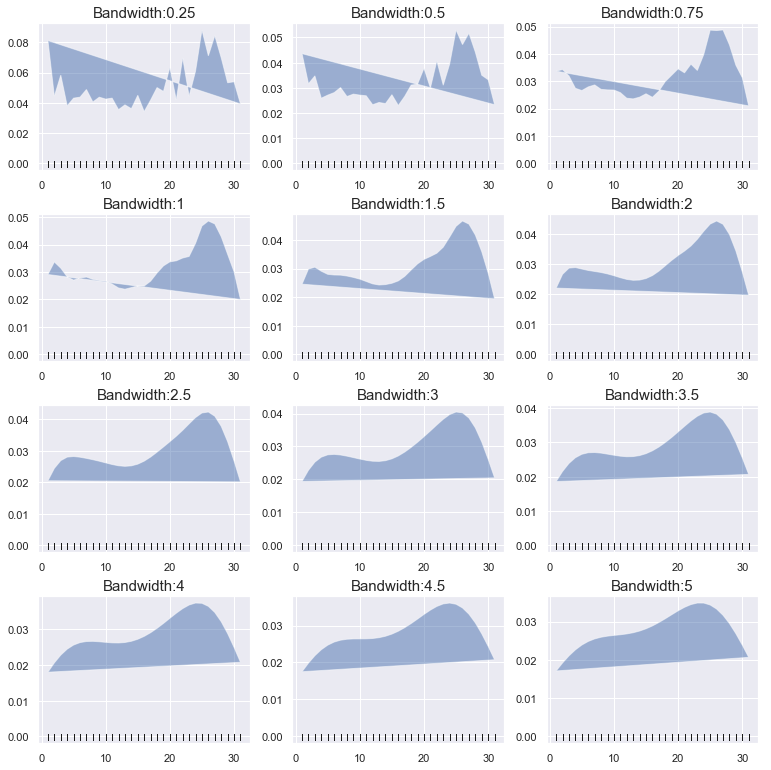

In [142]:
# Plotting the set of probabilities as a distribution for different bandwidths

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.3, wspace=0.2)

for i in range(12):
    fig.add_subplot(4,3, i+1);
    plt.fill(X_plot2, np.exp(logprobs2[i]), alpha=0.5)
    plt.plot(days, np.full_like(days, -0.0001), '|k', markeredgewidth=1)
    plt.title('Bandwidth:' + str(bandwidths2[i]), fontsize=15)
    
plt.show()

In [109]:
# Selecting the most optimal kernel density model
logprob2 = logprobs2[2]

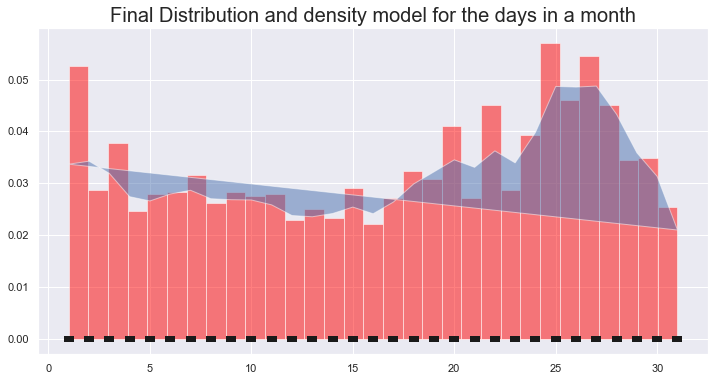

In [113]:
# Plotting the ideal bin size histogram with the ideal kernel density bandwidth plot

plt.figure(figsize=(12,6))
plt.hist(days_in_month, density=True,bins=31,alpha=0.5,color='red')
plt.fill(X_plot2, np.exp(logprob2), alpha=0.5)
plt.plot(days_in_month, np.full_like(days_in_month, -0.0001), '|k', markeredgewidth=10)
plt.title('Final Distribution and density model for the days in a month', fontsize=20)
plt.show()

# Modelling the amount of purchase

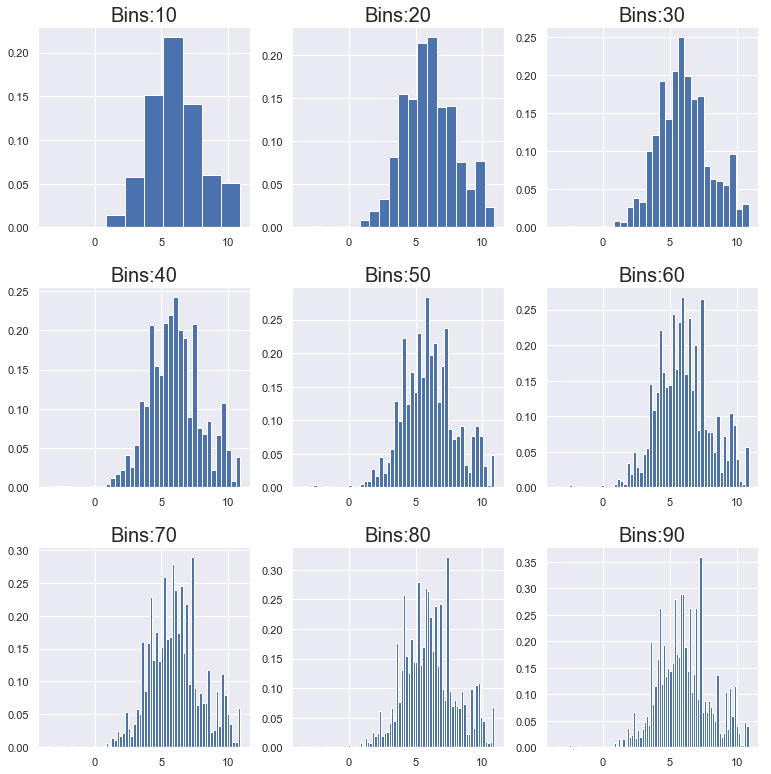

In [19]:
log_amounts = np.log(list(abs(data.Amount))).reshape(-1,1)
# Plotting the data for transaction amounts for different bin sizes

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.3, wspace=0.2)

for i in [10,20,30,40,50,60,70,80,90]:
    fig.add_subplot(3,3, i//10);
    hist = plt.hist(log_amounts, bins=i, density=True)
    plt.title('Bins:' + str(i), fontsize=20)
    
plt.show()

In [20]:
logprobs3 = []
X_plot3 = np.linspace(-15,15,10000).reshape(-1,1)

# We run the Gaussian Kernel density model for a realistic support line (X_plot3)
# We collect the set of log probabilities of each model for plotting purposes later

bandwidths3 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for bandwidth in bandwidths3:
    kde3 = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde3.fit(log_amounts)
    logprob3 = kde3.score_samples(X_plot3)
    logprobs3.append(logprob3)

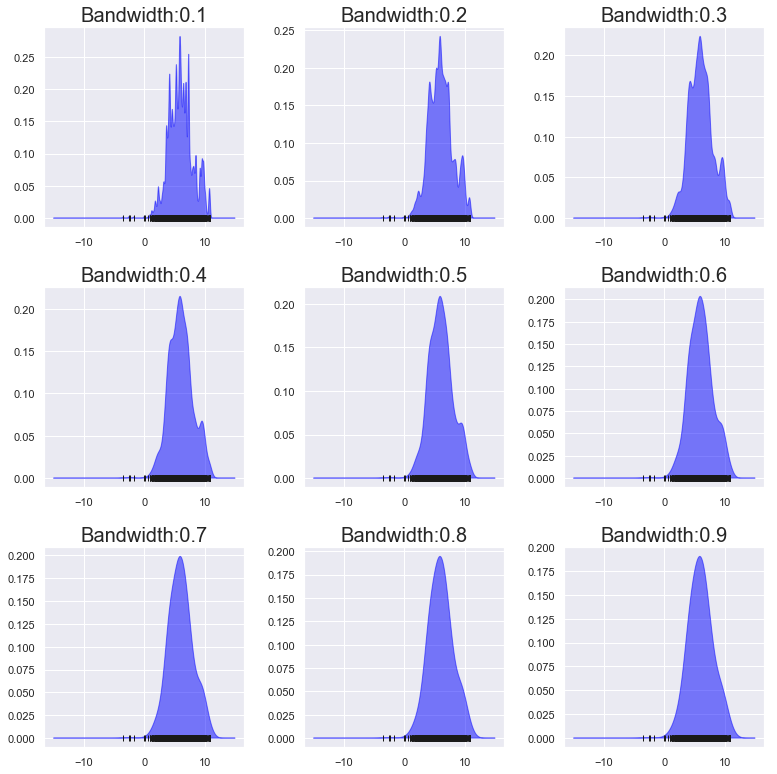

In [21]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.3, wspace=0.3)

# Plotting the set of probabilities as a distribution for different bandwidths

for i in range(9):
    fig.add_subplot(3,3, i+1);
    plt.fill(X_plot3, np.exp(logprobs3[i]), alpha=0.5,color='blue')
    plt.plot(log_amounts, np.full_like(log_amounts, -0.0001), '|k', markeredgewidth=1)
    plt.title('Bandwidth:' + str(bandwidths3[i]), fontsize=20)
    
plt.show()

In [104]:
# Selecting the ideal set of probabilities
logprob3 = logprobs3[1]

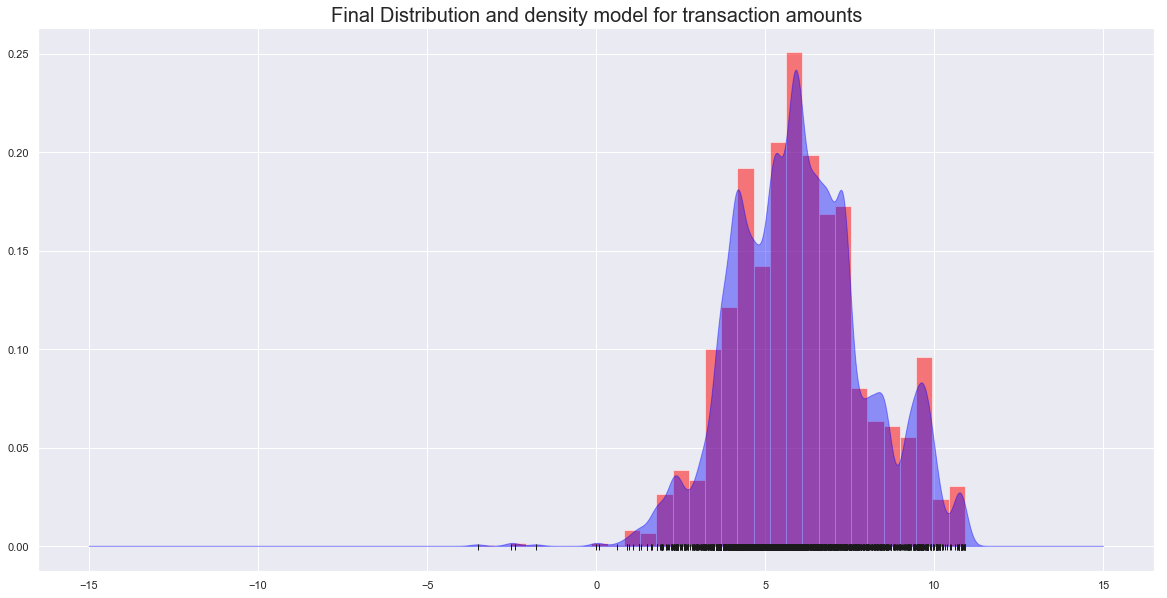

In [105]:
# Plotting the ideal bin size histogram with the ideal kernel density bandwidth plot

plt.figure(figsize=(20,10))
plt.hist(log_amounts, density=True,bins=30,alpha=0.5,color='red')
plt.fill(X_plot3, np.exp(logprob3), alpha=0.4,color= 'blue')
plt.plot(log_amounts, np.full_like(log_amounts, -0.0001), '|k', markeredgewidth=1)
plt.title('Final Distribution and density model for transaction amounts', fontsize=20)
plt.show()

# Sampling a sample month of transactions

In [132]:
# Function to sample a month of fictitious transactions

def sample_month():
    
    days = []
    daily_amounts = []
    
    for i in range(31):
        
        day_cumsum = np.cumsum(np.exp(logprob2)) # Converting the probabilities to a scale from 0 to 1
        
        day_prob = random.uniform(0,max(day_cumsum)) # Selecting a random number between 0 and 1
        
        # Based on the random number, we select the sample from the support.
        # Samples with higher probabilities have higher contribution to the cumulative sum
        
        # Hence, more random numbers will lead to samples that are more probable while
        # less random numbers will lead the less random numbers
        
        day = X_plot2[np.where(day_cumsum >= day_prob)[0][0]][0] #The corresponding sample
        
        # We do the same sampling procedure for the number of transactions
        # and the amounts for each transaction
    
        number_cumsum = np.cumsum(np.exp(logprob))
        number_prob = random.uniform(0,max(number_cumsum))
        number = X_plot[np.where(number_cumsum >= number_prob)[0][0]][0]
    
        amount_cumsum = np.cumsum(np.exp(logprob3))
        
        # Sampling amounts for a total 'n' times where n is the number sampled earlier
        
        for i in range(int(number)): 
            amount_prob = random.uniform(0,max(amount_cumsum))
            amount = X_plot3[np.where(amount_cumsum >= amount_prob)[0][0]][0]
            days.append(day)
            daily_amounts.append(amount)
    
    return days,daily_amounts

In [133]:
# Running the simulation
days_sample,daily_amounts = sample_month()

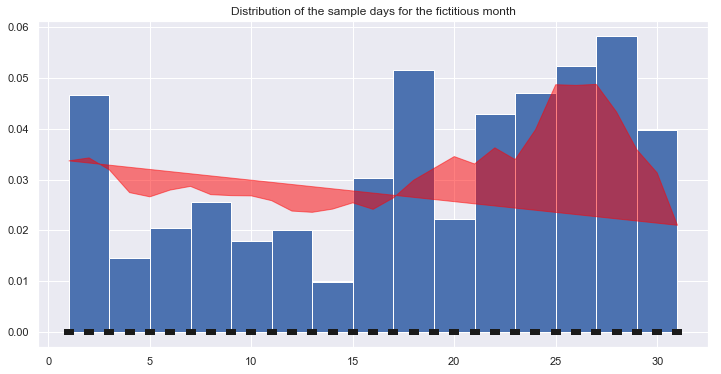

In [134]:
# Plotting the sample days
plt.figure(figsize=(12,6))
plt.hist(days_sample, bins=15, density = True)
plt.fill(X_plot2, np.exp(logprob2), alpha=0.5,color='red')
plt.plot(days_in_month, np.full_like(days_in_month, -0.0001), '|k', markeredgewidth=10)
plt.title('Distribution of the sample days for the fictitious month')
plt.show()

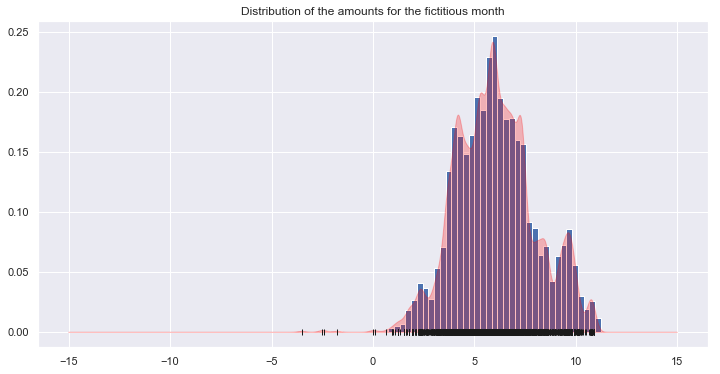

In [135]:
# Plotting the sample amounts
plt.figure(figsize=(12,6))
plt.hist(daily_amounts, bins=50, density = True)
plt.fill(X_plot3, np.exp(logprob3), alpha=0.25,color= 'red')
plt.plot(log_amounts, np.full_like(log_amounts, -0.0001), '|k', markeredgewidth=1)
plt.title('Distribution of the amounts for the fictitious month')
plt.show()

# Simulation for verification of Benford's Law

In [136]:
def simulation():
    
    # Running the above sampling procedure
    days_sample,daily_amounts = sample_month()
    final_amounts = np.exp(daily_amounts)
    
    # Converting amounts from the log space to actual amounts
    
    ones = 0
    twos = 0
    
    # For each amount, we convert it to a string, get the first digit, convert back and then compare

    for amount in final_amounts:
        first_digit = int(str(amount)[0])
    
        if first_digit == 1:
            ones += 1
        if first_digit == 2:
            twos += 1
    
    # We return them as percentages
    
    return ones*100/len(final_amounts), twos*100/len(final_amounts)

In [137]:
# Running the simulation 100 times to get accurate results with an estimate of uncertainity
# which is given by the confidence intervals

one_percentages = []
two_percentages = []

for i in range(100):
    ones, twos = simulation()
    
    one_percentages.append(ones)
    two_percentages.append(twos)

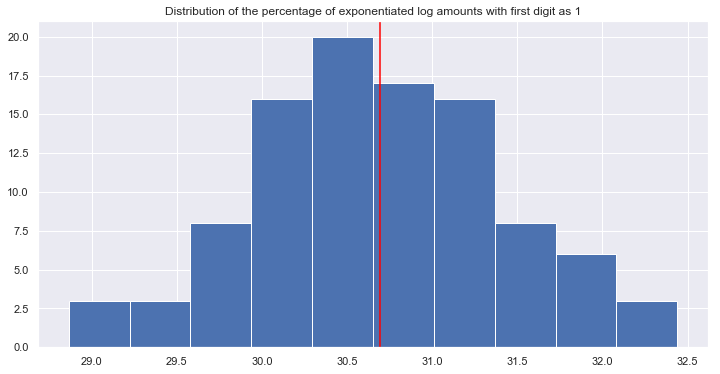

In [138]:
# Plotting the sample percentages of amounts with first digit as 1

plt.figure(figsize=(12,6))
plt.title('Distribution of the percentage of exponentiated log amounts with first digit as 1')
plt.hist(one_percentages)
plt.axvline(np.mean(one_percentages),color='red')
plt.show()

In [139]:
# Printing the descriptive statistics of the sample percentages of amounts with first digit as 1

print(round(np.mean(one_percentages),2), 
      round(np.percentile(one_percentages, 2.5),2), round(np.percentile(one_percentages, 97.5),2) )

30.7 29.17 32.11


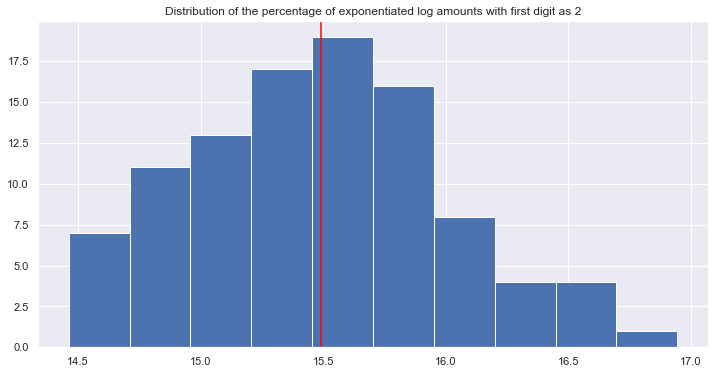

In [140]:
# Plotting the sample percentages of amounts with first digit as 2

plt.figure(figsize=(12,6))
plt.title('Distribution of the percentage of exponentiated log amounts with first digit as 2')
plt.hist(two_percentages)
plt.axvline(np.mean(two_percentages),color='red')
plt.show()

In [141]:
# Printing the descriptive statistics of the sample percentages of amounts with first digit as 2

print(round(np.mean(two_percentages),2), 
      round(np.percentile(two_percentages, 2.5),2), round(np.percentile(two_percentages, 97.5),2) )

15.49 14.58 16.51
